In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure',autolayout = True)
plt.rc('axes',labelweight='bold',labelsize='large', titleweight='bold',titlesize = 18,titlepad=10)
plt.rc('image',cmap='magma')
tf.config.run_functions_eagerly(True)

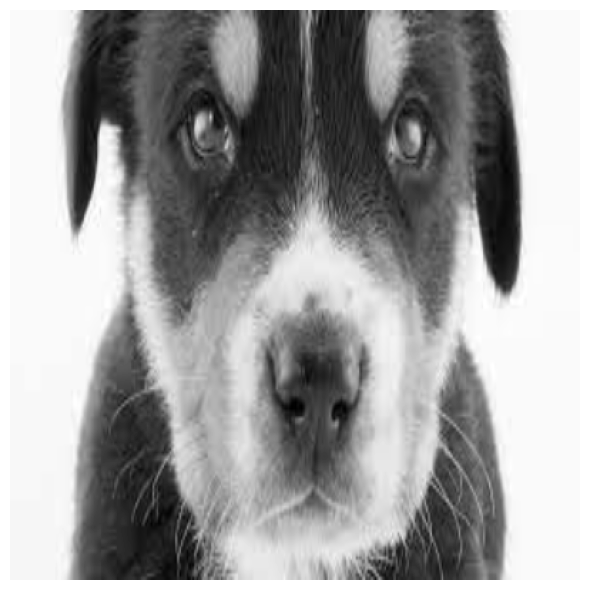

In [6]:
image_path = 'sample_data/Doggie.jpeg'
image = tf.io.read_file(image_path)
image.get_shape().as_list() # []
image = tf.io.decode_jpeg(image,channels= 1)
image.get_shape().as_list()
image = tf.image.resize(image, size=[400, 400])
image.get_shape().as_list()

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6,6))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [8]:
kernel = tf.constant([
    [1,2,-2],
    [0,0,0],
    [3,-3,1]
])
# batch compatibility stuff
image = tf.image.convert_image_dtype(image,dtype = tf.float32)
image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel, [*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

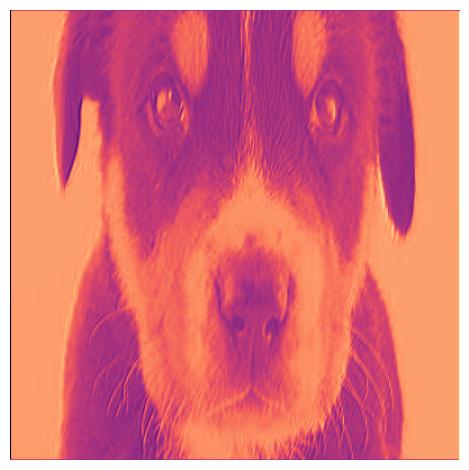

In [11]:
# Definition of convolution here
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input = image,
    filters = kernel,
    strides=1,
    padding='SAME',
)
plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

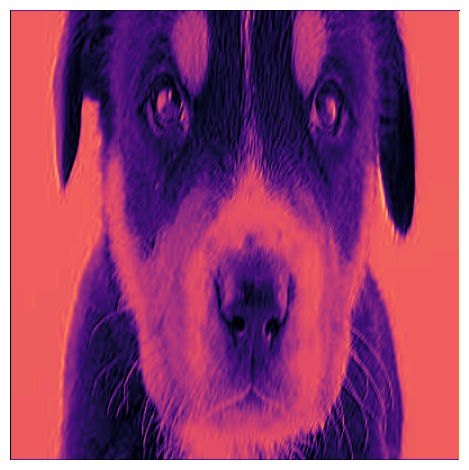

In [12]:
# Activiation function
relu = tf.nn.relu
image_relu = relu(image_filter)

plt.imshow(
    tf.squeeze(image_relu)
)
plt.axis('off')
plt.show()
